# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sympy as sym
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
result = []

In [4]:
# i - пробегает по каждому пользователю
i = 0
for i in range(len(raitings)):
# j будет пробегать по всем остальным пользователям, при фиксированном i
# j_min - номер пользователя с минимальным косинусом относительно выбранного пользователя
# range_min - значение минимального косинуса
    j = 0
    j_min = -1
    range_min = 1
    for j in range(len(raitings)):
        # важно не сравнивать пользователя с самим собой
        if i == j:
            j += 1
        else:
            # рассчитываем косинус по стандартной функции
            cos_ = np.dot(raitings[i],raitings[j])/(math.sqrt(np.dot(raitings[i],raitings[i]))*
                                                    (math.sqrt(np.dot(raitings[j],raitings[j]))))
            range_ = math.acos(cos_)
            # проверяем на минимальность
            if range_ < range_min:
                range_min = range_
                j_min = j
            j += 1
    # записываем результат, берем след польхователя
    result.append([i, j_min])
    i += 1

In [5]:
result

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

### Для уменьшения кол-ва признаков, воспользуемся разложением матрицы

In [6]:
from sklearn.decomposition import TruncatedSVD
# задаем в переменную метод разложения СВД с 5 компонентами
svd = TruncatedSVD(n_components=5)

In [7]:
# из массива сделал табличку
raitings_df = pd.DataFrame(raitings)

In [8]:
# само разложение
singukar_value = svd.fit_transform(raitings_df)
# преобразование результата в таблицу
projected_x = pd.DataFrame(data = singukar_value,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3', 'atribute_4', 'atribute_5'])

In [9]:
projected_x

,atribute_1,atribute_2,atribute_3,atribute_4,atribute_5
0,23.419821,-5.360921,3.831968,-4.069502,1.102673
1,24.767749,4.521887,1.358160,1.581285,8.599120
2,22.277286,-6.964920,-4.844615,-0.476616,3.371523
3,19.425776,2.645752,-6.860140,-4.766048,1.960757
4,22.814635,0.514641,7.701802,4.423798,1.291242
5,21.769617,1.942950,-4.569348,8.323065,-2.218874
6,21.234275,9.780478,1.163403,-4.860745,-2.608155
7,19.974768,4.000487,-1.674563,1.151235,-3.563717
8,26.393070,-3.030905,5.864228,-1.675035,-3.715001
9,29.940168,-4.820123,-3.489124,0.055271,-3.625265


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [10]:
# create a "symbol" called x
x = sym.Symbol('x')

#Define function
f = sym.tan(sym.sin(x)+sym.cos(2*x+3))**2

#Calculating Derivative
derivative_f1 = f.diff(x)

print('Функция: ', f)
print('Первая производная: ', f.diff(x))
print('Значение первой производной в точке х=1: ', f.diff(x).evalf(subs={'x':1}))

Функция:  tan(sin(x) + cos(2*x + 3))**2
Первая производная:  2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение первой производной в точке х=1:  55.3859176353379


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [11]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [12]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [13]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

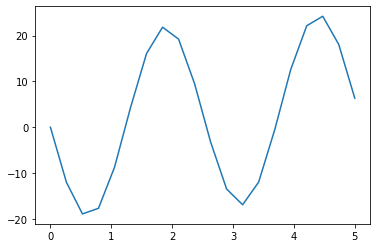

In [14]:
plt.plot(x, fx)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [16]:
res = minimize(error, [0,0], method='COBYLA')

In [17]:
res.x

array([ 3.00000388, -2.49992627])

In [18]:
error(res.x)

0.04807800794774142

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [19]:
#создание случайной величины и ее распределения
discret_value = pd.DataFrame([[10, 0.047],
                             [11, 0.052],
                             [12, 0.0525],
                             [13, 0.055],
                             [14, 0.057],
                             [15, 0.0575],
                             [16, 0.058],
                             [17, 0.059],
                             [18, 0.06],
                             [19, 0.062],
                             [20, 0.068],
                             [21, 0.072],
                             [22, 0.062],
                             [23, 0.06],
                             [24, 0.054],
                             [25, 0.04],
                             [26, 0.032],
                             [27, 0.022],
                             [28, 0.01],
                             [29, 0.01],
                             [30, 0.01]],
                             columns=['X','P'])

In [20]:
result = []
for i in range(50):
    samples = np.random.choice(discret_value.X, size=1000)
    result.append(samples.mean())

<AxesSubplot:ylabel='Count'>

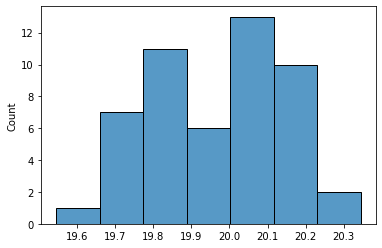

In [21]:
sns.histplot(result)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [22]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [23]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
